#Fraudulent Credit Card Transactions

## About the Dataset



The link to the dataset used in this project can be found
[here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

This dataset comprises credit card transactions from European cardholders, recorded over two days in September 2013. Out of 284,807 transactions, 492 are labeled as fraudulent, representing 0.172% of all transactions, making this a highly imbalanced dataset. The dataset consists of 30 features:

• **Principal Component Features (V1, V2, ..., V28):**These are anonymized, PCA-transformed variables. Due to confidentiality, the exact nature of these features is not disclosed.

• **Time:** This variable measures the time in seconds since the first recorded transaction, providing a temporal aspect to the dataset.

**Amount:** This is the transaction amount, which can be useful for cost-sensitive learning in fraud detection.

• **Class:** This is the target variable, where 1 represents a fraudulent transaction and 0 represents a legitimate transaction.

• **Characteristics of V1-V28:**

• **Uninterpretable by nature:** Since they are principal components, these features don’t have straightforward meanings like “amount spent” or “time of day.”

• **Represent hidden patterns:** Each component highlights underlying relationships or trends in the data, potentially relating to transaction behaviors that are characteristic of fraud.

• **Useful for pattern recognition:** Despite being anonymized, these features often capture enough variance to allow predictive algorithms to distinguish between fraudulent and legitimate transactions effectively.


## Objective

**Using this dataset, we will analyze which features—particularly PCA-transformed components (V1–V28), 'Amount,' and 'Time'—are most indicative of fraudulent credit card transactions. Based on the insights gained from this analysis, we will develop and evaluate a classification model to validate the predictive power of these features in distinguishing authentic transactions from fraudulent ones.**

## Hypothesis

We hypothesize that certain features (likely a subset of the PCA-transformed components, along with 'Amount' and 'Time') are more predictive of fraudulent behavior. By examining feature importance, we aim to identify patterns in transaction behavior that are indicative of fraud. Specifically, we expect that transactions with anomalous 'Amount' values and/or times may have a higher likelihood of being fraudulent.

## Approach





Using this dataset, we will analyze which features most effectively indicate fraudulent behavior. We will explore patterns in the PCA components (V1–V28) and the features 'Amount' and 'Time' to determine if any values or combinations of values are consistently associated with fraud. We will conduct through data analysis to identify which variables contribute most to the detection process. Finally, we will build and evaluate a fraud detection model to confirm the predictive strength of transactions as authentic or fraudulent.

Our approach includes three parts:

- Part 1: Exploring and Refining the Dataset
- Part 2: Data Analysis and Visualization
- Part 3: Classification Model Training and Evaluation

## Set up

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import time

import os

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Part 1: Exploring and Refining the Dataset



## In this step, we load the dataset, examine its size and structure, confirm there are no missing values and drop duplicate values. We also compute statistical summaries for the features to understand their distributions and prepare the data for subsequent analysis.

In [ ]:
# Load data

data = pd.read_csv("/content/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Dataset size

data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As seen above, this dataset does not have any missing values.

In [ ]:
data.duplicated().sum()

1081

In [ ]:
# Dropping duplicates
data=data.drop_duplicates()

In [ ]:
data['Class'].value_counts()

,count
Class,
0,283253
1,473


In [ ]:
# Statistical description of the features

features = data.drop(['Class'], axis = 1)
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


# Part 2: Data Analysis and Visualization

## In this part, we will ask a series of questions to better understand the features of the data with our key variable, 'class'. To answer our questions, we will employ both, statisitcal and visualization tools.

### How many authentic and fraudulent transactions are in the dataset?

In [ ]:
# Splitting the data by class of transactions
data_authentic = data[data['Class'] == 0]  # authentic transactions only
data_fraud = data[data['Class'] == 1]     # fraud transactions only

# Class frequencies
class_label = ['Authentic', 'Fraud']
class_frequency = [len(data_authentic), len(data_fraud)]

# Pie chart
Pie_chart = px.pie(
    values=class_frequency,
    names=class_label,
    title='Distribution of Authentic and Fraudulent Transactions',
    template='ggplot2',
    color_discrete_sequence=['blue', 'red']
)
Pie_chart.show()


In [ ]:
# Total number of transactions
total_transactions = len(data)

# Percentages of each class
print('Authentic transactions are {:.2f}% of our data.'.format((data['Class'].value_counts()[0] / total_transactions) * 100))
print('Fraudulent transactions are {:.2f}% of our data.'.format((data['Class'].value_counts()[1] / total_transactions) * 100))


Authentic transactions are 99.83% of our data.
Fraudulent transactions are 0.17% of our data.


### Are there any strong correlations between the features in our dataset that could indicate multicollinearity?


Text(0.5, 1.0, 'Heat Map of the Feature Variables')

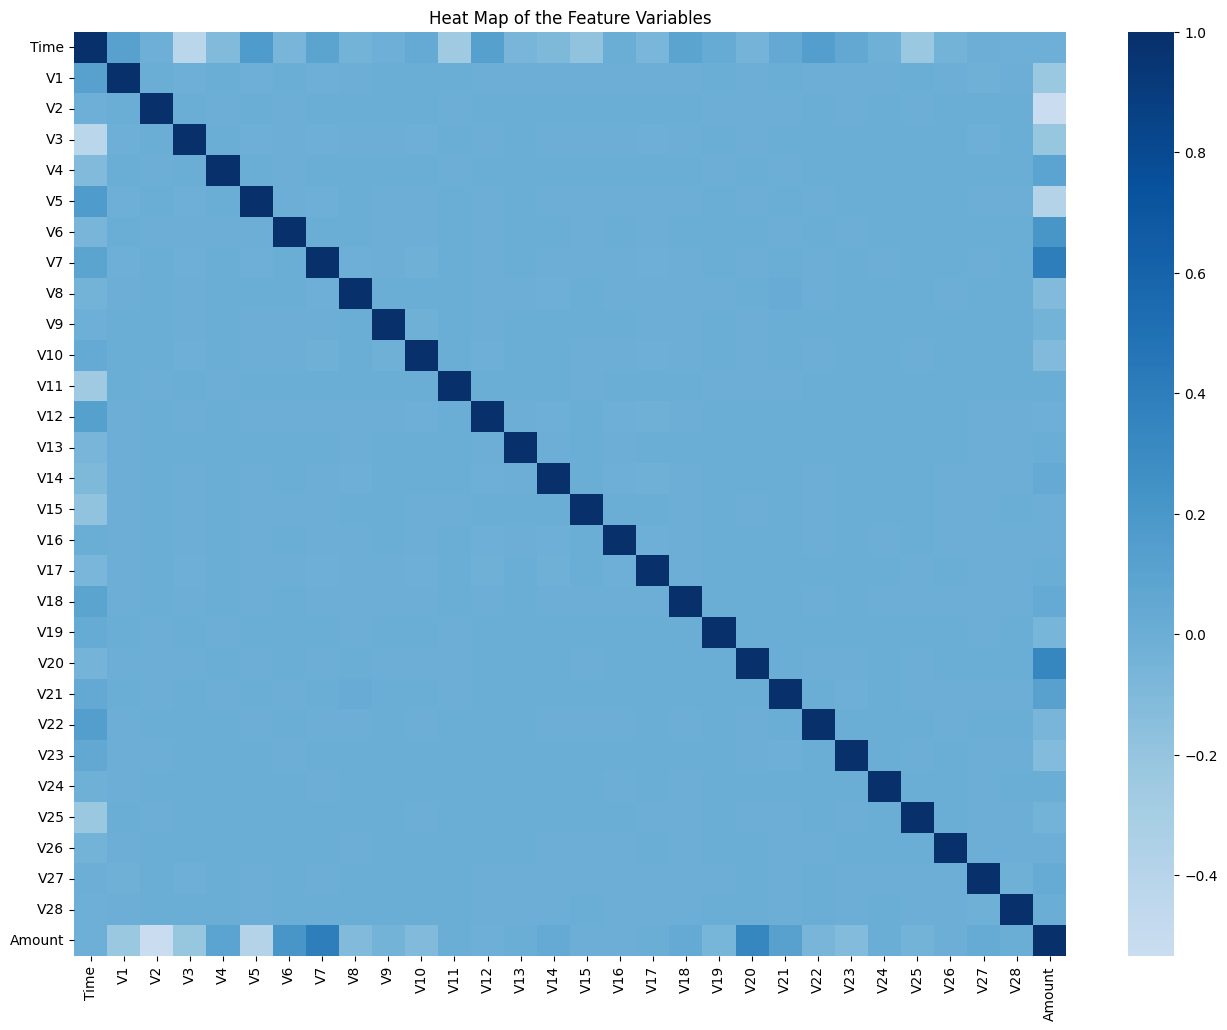

In [ ]:
# Heat map of the feature variables

features = data.drop(['Class'], axis = 1)

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(features.corr(), center = 0, cmap = 'Blues')
ax.set_title('Heat Map of the Feature Variables')



Observations:

- As expected, PCA (V1 - V28) features are uncorrelated. PCA features are supposed to be uncorrelated because PCA makes them independent of each other.

Text(0.5, 1.0, 'Heat Map of the Feature Variables for Authentic Transactions')

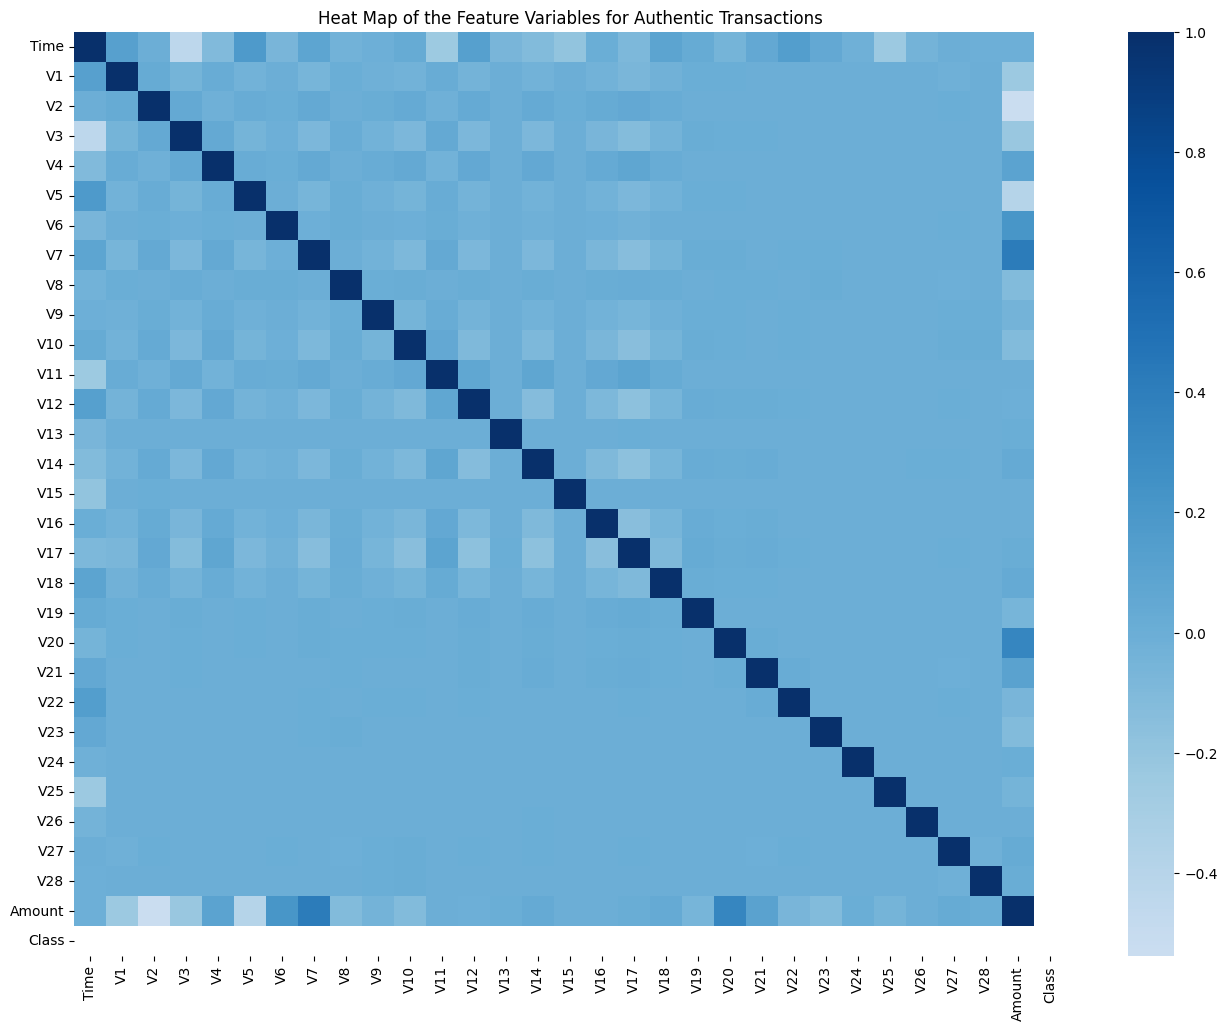

In [ ]:
# Heat map of the feature variables for ONLY authentic transactions

features_authentic = data_authentic.drop(['Class'], axis = 1)

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data_authentic.corr(), center = 0, cmap = 'Blues')
ax.set_title('Heat Map of the Feature Variables for Authentic Transactions')

Observations:

- When considerating only authentic transactions, our heat map looks a bit different.

Text(0.5, 1.0, 'Heat Map of the Feature Variables for Fraudulent Transactions')

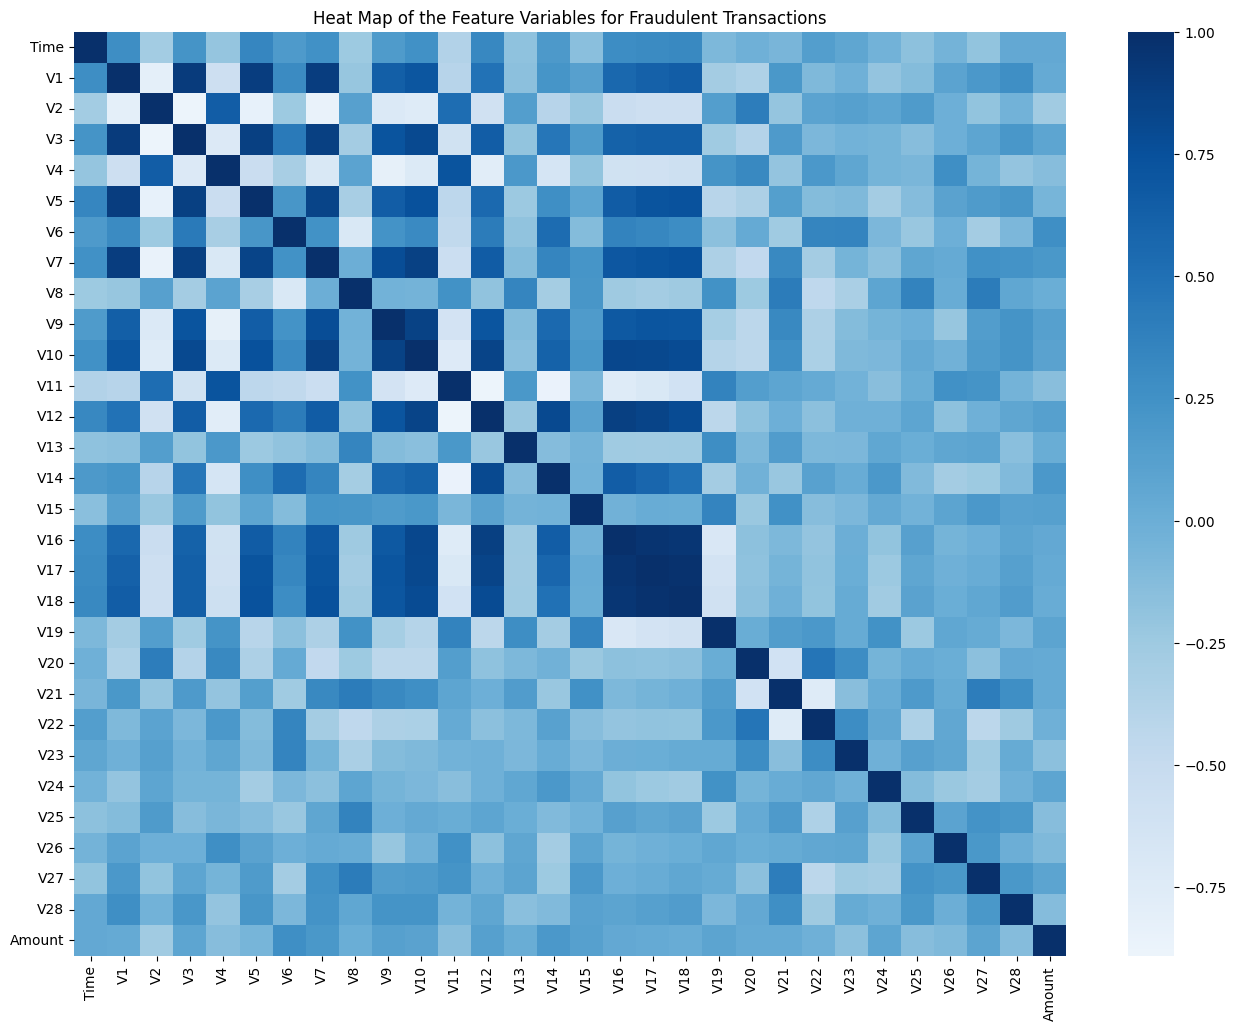

In [ ]:
# Heat map of the feature variables for ONLY fraudulent transactions

features_fraud = data_fraud.drop(['Class'], axis = 1)

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(features_fraud.corr(), center = 0, cmap = 'Blues')
ax.set_title('Heat Map of the Feature Variables for Fraudulent Transactions')

Observations:

- When considerating only fradulent transactions, our heat map looks significantly different. Some features appear to have relatively stronger correlations with each other. This suggests that fraudulent transactions may exhibit distinct patterns that could be useful for detection.

### What are the correlation coefficients between each feature in the dataset and the 'Class' variable (authentic vs. fraudulent transactions)?"

In [ ]:
# Calculating correlation with the 'Class' variable
correlation_with_class = data.corr()['Class'].sort_values(ascending=False)

# Dropping the 'Class' variable from the correlation results
correlation = correlation_with_class.drop('Class')

correlation

,Class
V11,0.149067
V4,0.129326
V2,0.084624
V19,0.033631
V8,0.033068
V21,0.026357
V27,0.021892
V20,0.021486
V28,0.009682
Amount,0.005777


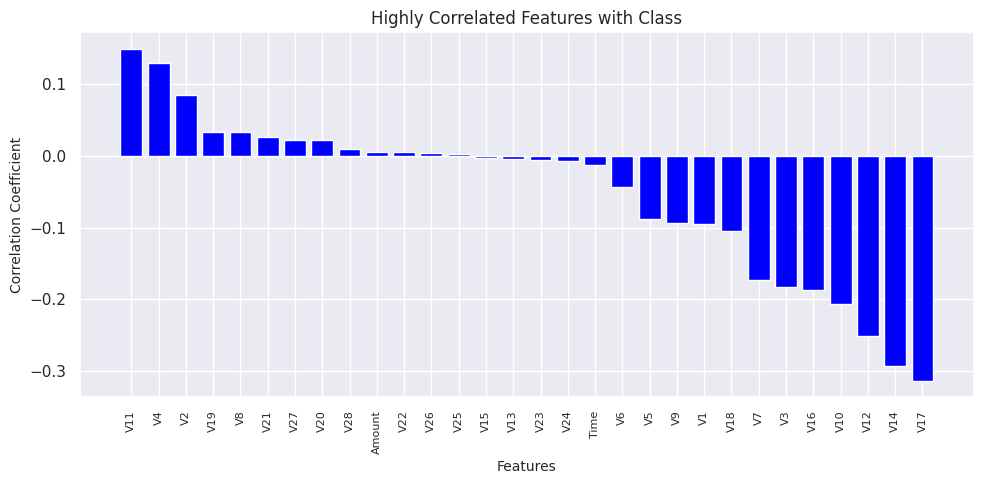

In [ ]:
# Seaborn dark grid style
sns.set_theme(style="darkgrid")

# Bar Plot
plt.figure(figsize=(10, 5))
plt.bar(correlation.index, correlation.values, color='blue')

# Plot appearance
plt.title("Highly Correlated Features with Class", fontsize=12)
plt.xlabel("Features", fontsize=10)
plt.ylabel("Correlation Coefficient", fontsize=10)
plt.xticks(rotation=90, ha="center", fontsize=8)
plt.tight_layout()
plt.show()

Observations:

There is no 'strong' linear correlation - PCA transformation of the features generates new components that are optimized to catch variance but not necessarily to preserve the relationships with the target variable. Despite the PCA transformation, there are some appearent patterns.

Features V11, V4, and V2 have positive correlations with the class variable suggesting that they are likely associated with fraudulent transactions.

Features V17, V14, and V12 show negative correlation with class, suggesting their relavance to authentic transaction.

It is also notable that 'Amount' and 'Time' are not PCA transformed features, but both do not show any particular linear correlation with either authentic or fraudulent transactions. This suggests that while there is no linear correlation, their relationship with authentic and fraudulent transactions may be complex and/or influenced by non-linear patterns.



### Which PCA components (features) are significantly different between legitimate and fraudulent transactions?

We will perform our statistical analysis using z-score significance, with a z-score threshold of 3.37 corresponding to a significance level (p-value) of approximately 0.001 and 99.95% confidence level. This analysis will help identify which PCA components are significantly different between the two classes

In [ ]:
# PCA columns
PCA_columns = [x for x in data.columns if 'V' in x]

# Transactions separated by class
valid_transactions = data[data.Class == 0]
fraud_transactions = data[data.Class == 1]

# Number of rows in the fraudulent transactions
sample_size = fraud_transactions.shape[0]

#Making note of insignificant and significant columns for creating models
insignificant_cols = []
significant_cols = []

# Z-scores and determine significance
for col in PCA_columns:
    mean_valid = valid_transactions[col].mean()
    std_valid = valid_transactions[col].std()

    # Z-score calculation
    zScore = (fraud_transactions[col].mean() - mean_valid) / (std_valid / (sample_size ** 0.5))

    print('Column', col, 'is', 'Significant' if abs(zScore) >= 3.37 else 'Insignificant')

    if abs(zScore) >= 3.37:
      significant_cols.append(col)
    else:
      insignificant_cols.append(col)


Column V1 is Significant
Column V2 is Significant
Column V3 is Significant
Column V4 is Significant
Column V5 is Significant
Column V6 is Significant
Column V7 is Significant
Column V8 is Significant
Column V9 is Significant
Column V10 is Significant
Column V11 is Significant
Column V12 is Significant
Column V13 is Insignificant
Column V14 is Significant
Column V15 is Insignificant
Column V16 is Significant
Column V17 is Significant
Column V18 is Significant
Column V19 is Significant
Column V20 is Significant
Column V21 is Significant
Column V22 is Insignificant
Column V23 is Significant
Column V24 is Significant
Column V25 is Insignificant
Column V26 is Insignificant
Column V27 is Significant
Column V28 is Significant


### What are the temporal patterns in transaction activity for authentic versus fraudulent transactions?

The dataset has a column called 'Time' which are seconds from which the very first data observation took place. We will convert that to hours of a day.

In [ ]:
# Converting time to hours
data.loc[:,'hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

In [ ]:
# Pivot table to count transactions for each hour and class
transaction_count_by_hour = data.pivot_table(
    values='Amount',
    index='hour',
    columns='Class',
    aggfunc='count'
)

transaction_count_by_hour


Class,0,1
hour,,
0.0,10868,17
1.0,7639,6
2.0,4200,10
3.0,3258,48
4.0,3471,17
5.0,2180,23
6.0,2977,11
7.0,4074,9
8.0,7209,23


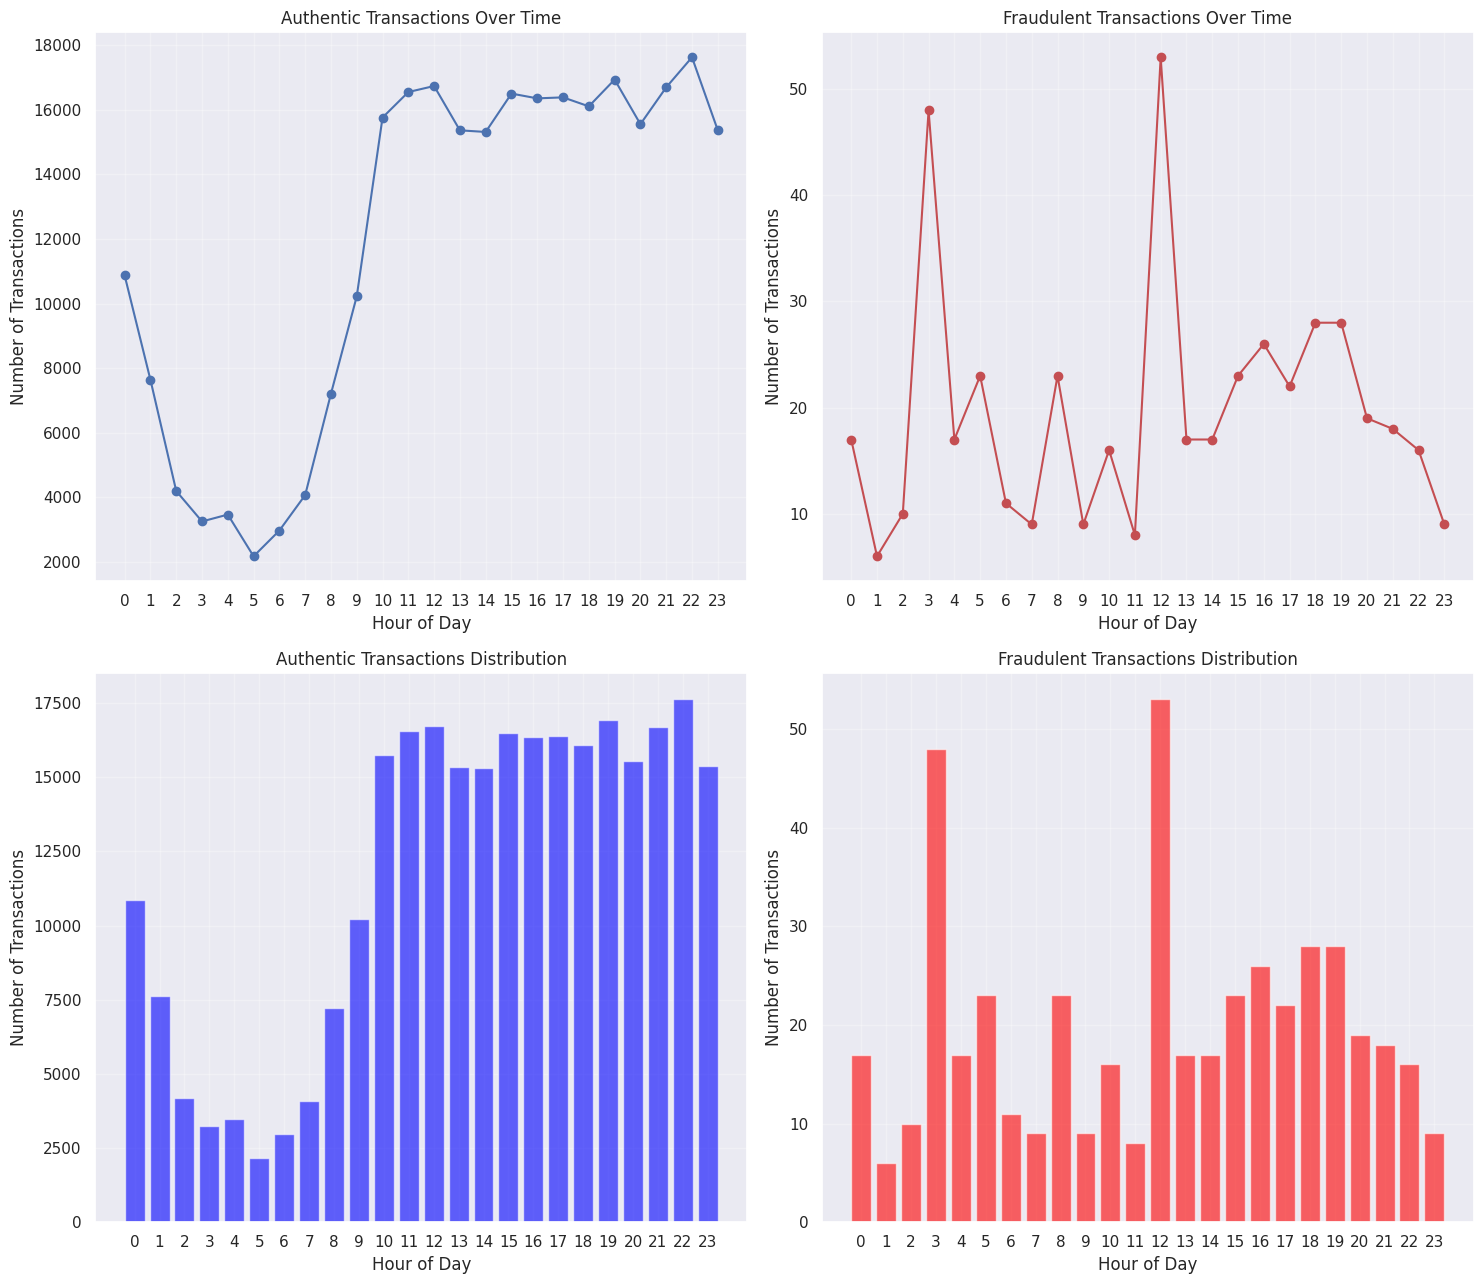

In [ ]:
# Figure w 2x2 subplots
plt.figure(figsize=(15, 13))

# Plot 1: Authentic Transactions (Line)
plt.subplot(2, 2, 1)
plt.plot(transaction_count_by_hour.index, transaction_count_by_hour[0], 'b-', marker='o')
plt.title('Authentic Transactions Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)
plt.xticks(range(24))

# Plot 2: Fraudulent Transactions (Line)
plt.subplot(2, 2, 2)
plt.plot(transaction_count_by_hour.index, transaction_count_by_hour[1], 'r-', marker='o')
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)
plt.xticks(range(24))

# Plot 3: Authentic Transactions (Bar)
plt.subplot(2, 2, 3)
plt.bar(transaction_count_by_hour.index, transaction_count_by_hour[0], color='blue', alpha=0.6)
plt.title('Authentic Transactions Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)
plt.xticks(range(24))

# Plot 4: Fraudulent Transactions (Bar)
plt.subplot(2, 2, 4)
plt.bar(transaction_count_by_hour.index, transaction_count_by_hour[1], color='red', alpha=0.6)
plt.title('Fraudulent Transactions Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)
plt.xticks(range(24))

plt.tight_layout()
plt.show()

Observations:

Authentic transactions show consistent patterns with lower activity in early morning hours. Authentic transactions were overall high from 9 AM to 11 PM, peaking at 10 PM, and showed a sharp decline in activity during early morning hours (12 AM–6 AM), with the lowest activity being at 5 AM.

However, fraudulent transactions showed an inconsistent pattern with two prominent spikes at 3:00 AM and 12:00 PM. Our findings are very relevant to real-world scenarios as well - with fraudulent transactions generally remaining sparse, with fewer than 30 transactions per hour for most hours of the day.




### Do fraudulent transactions occur during high or low transaction periods?

Our data is very unbalanced, where fraudulent transactions are significantly fewer compared to total transactions. Precisely, they only represent 0.167% of our data.

To address this, we will scale or normalize the data to better understand whether fradulent transactions occur during low or high transaction periods.

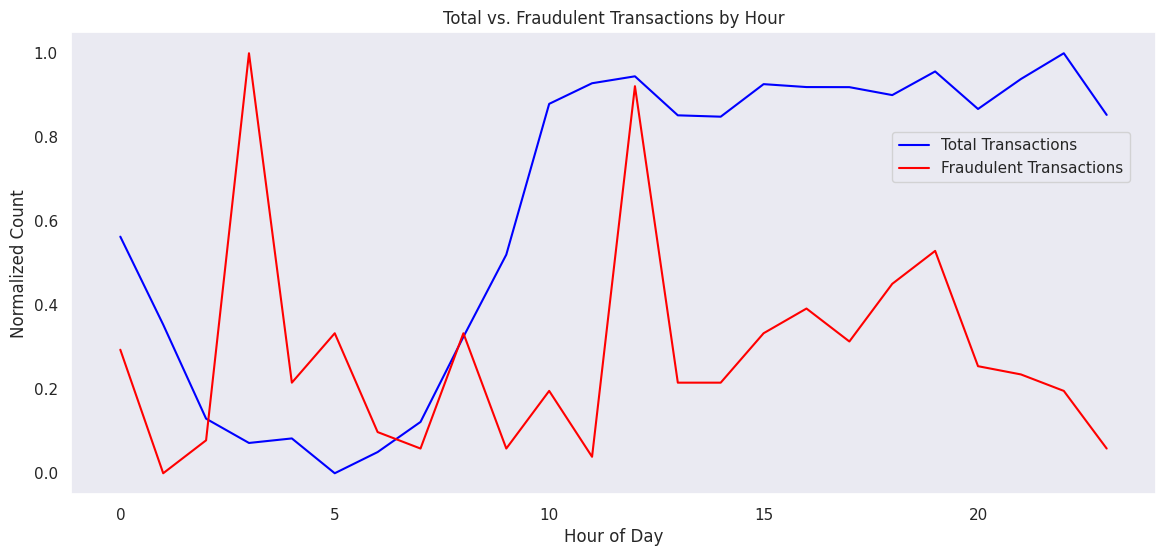

In [ ]:
# Normalizing the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(transaction_summary[['Total', 'Fraudulent']])
transaction_summary['Total_Normalized'] = normalized_data[:, 0]
transaction_summary['Fraudulent_Normalized'] = normalized_data[:, 1]

# Plotting normalized data
plt.figure(figsize=(14, 6))
plt.plot(transaction_summary.index, transaction_summary['Total_Normalized'], label='Total Transactions', color='blue')
plt.plot(transaction_summary.index, transaction_summary['Fraudulent_Normalized'], label='Fraudulent Transactions', color='red')
plt.title('Total vs. Fraudulent Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Normalized Count')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(0.75, 0.8))
plt.show()

Observations:

Total transactions follow a predictable daily routine. This aligns with our finding of authentic transactions following consistent patterns, given that 99.8% of our data is authentic transactions.

We already know that fraudulent transactions have a sporadic behaviour and inconsistent patterns, but this can be especially seen in the above line plot. Irregular spikes can be seen in both, high transaction periods and well as low transaction periods.
Spikes in fraudulent activity in low transaction periods happen during 3 AM, 4 AM, 5 AM.

Spikes in fraudulent activity during high transaction periods happen at 12 PM.
Interestingly, during early morning hours, when total transactions seem to significantly drop, fraudulent transactions seem to rise, suggesting a potential relationship between overall low activity and fraudulent behaviour. They also seem to coincide with a higher activity period at 12 PM.

These patterns suggest that while fraudulent transactions are less frequent and more sporadic compared to the consistent pattern of authentic transactions, they likely exploit low activity periods while also aligning with high-activity periods to blend in.






### How does the "fraud rate" vary across hours of the day?

In [ ]:
# Calculating fraud rate
transaction_summary['Fraud_Rate'] = transaction_summary['Fraudulent'] / transaction_summary['Total']

# Hours with high fraud rates
high_fraud_hours = transaction_summary[transaction_summary['Fraud_Rate'] > transaction_summary['Fraud_Rate'].mean()]

print("Hours with high fraud rates:")
high_fraud_hours


Hours with high fraud rates:


,Total,Fraudulent,Fraud_Proportion,Total_Normalized,Fraudulent_Normalized,Fraud_Rate
hour,,,,,,
3.0,3326,57,0.017138,0.072129,1.000000,0.017138
4.0,3493,17,0.004867,0.082903,0.215686,0.004867
5.0,2208,23,0.010417,0.000000,0.333333,0.010417
6.0,2990,11,0.003679,0.050452,0.098039,0.003679
8.0,7242,23,0.003176,0.324774,0.333333,0.003176
12.0,16857,53,0.003144,0.945097,0.921569,0.003144


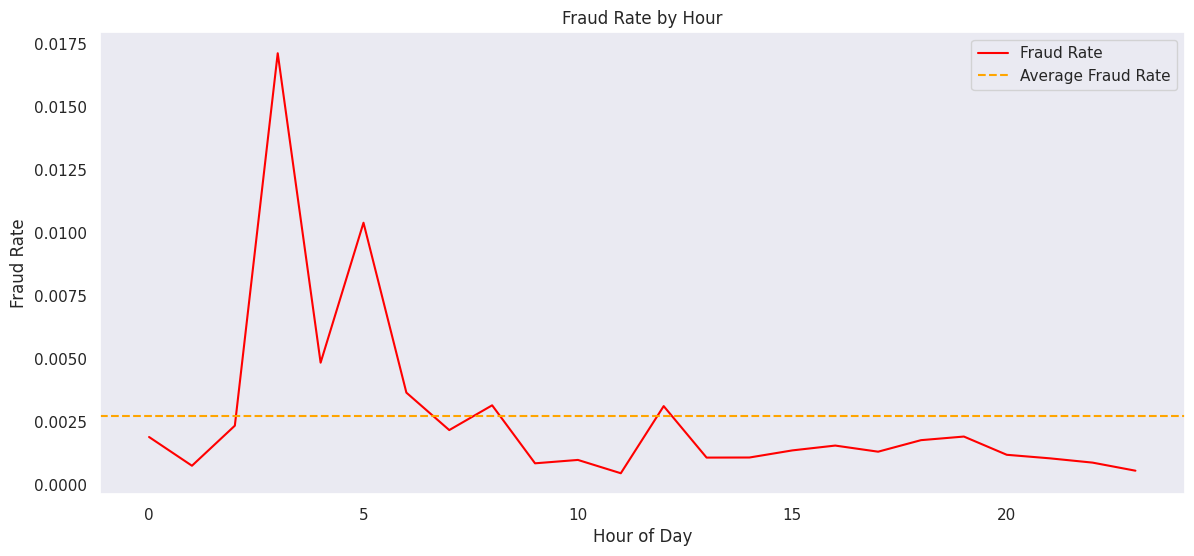

In [ ]:
# Fraud Rate plot
plt.figure(figsize=(14, 6))
plt.plot(transaction_summary.index, transaction_summary['Fraud_Rate'], label='Fraud Rate', color='red')
plt.axhline(transaction_summary['Fraud_Rate'].mean(), color='orange', linestyle='--', label='Average Fraud Rate')
plt.title('Fraud Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.grid()
plt.legend()
plt.show()

Observations:

1. Peak Fraud Rate:

The highest fraud rate occurs at 3 AM, significantly exceeding the average fraud rate.

2. Early Morning Spike:

Hours 3 AM to 5 AM show elevated fraud rates, indicating a potential vulnerability during early morning hours.

3. Noon Spike:

A smaller but notable spike in fraud rate is observed at 12 PM, coinciding with higher transaction volumes.

4. Below Average Fraud Rates:

Most hours after 6 AM have fraud rates below the average, with minimal activity in the late afternoon and evening.

### How do transaction amounts differ between authentic and fraudulent transactions across different hours of the day?

<ipython-input-196-9ba2587c40df>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



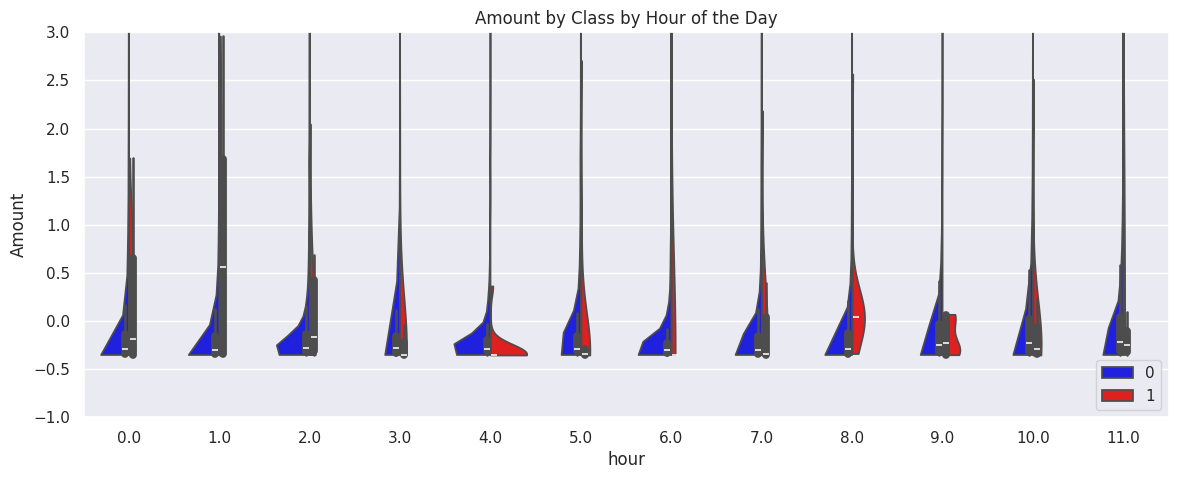

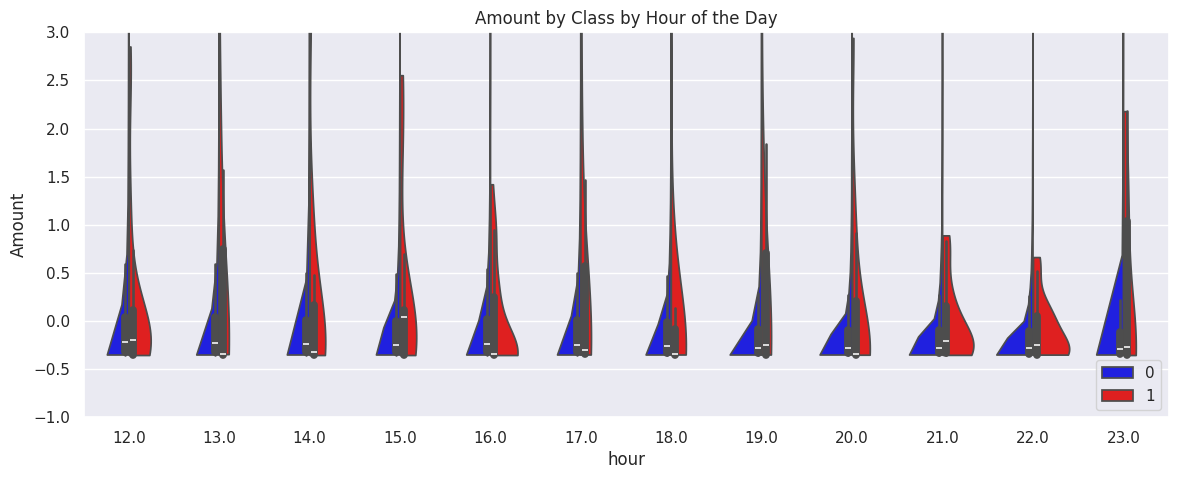

In [ ]:
Authentic = (data['Class'] == 0)
Fraudulent = (data['Class'] == 1)

# Standardizing the 'Amount' column
data['Amount'] = StandardScaler().fit_transform(data[['Amount']])

def PlotViolins(minHour, maxHour):
    plt.figure(figsize=(14, 5))
    plt.title('Amount by Class by Hour of the Day')
    plt.ylim([-1, 3.0])

    custom_palette = {0: 'blue', 1: 'red'}

    sns.violinplot(data=data[data['hour'].isin(range(minHour, maxHour + 1))],
                             x='hour',
                             y='Amount',
                             hue='Class',
                             split=True,
                             palette=custom_palette,
                             cut=0)
    plt.legend(loc='lower right')
    plt.show()

# first half of the day (hours 0-11)
PlotViolins(0, 11)

# second half of the day (hours 12-23)
PlotViolins(12, 23)

Observations:

The density patterns for fraudulent transactions (red) seem to vary significantly, while authentic transactions (blue) show more consistent patterns.

For many hours of the day, the amount distribution for the type transaction classes overlaps, suggesting that the amounts are similar.

From midnight to early morning, during 12 AM to 5 AM, both transaction classes show a smaller distribution of high amount values, with most of the transactions being low-value amounts.

Between 12 PM and 11 PM, fraudulent transactions appear to have more variability in the transaction amounts, potentially suggesting high amount values during these times. It is very interesting to note that while fraudulent transactions generally peak during early morning hours, the amount remains relatively low and is instead more varied in the afternoon and evening hours.


### What are the differences in the distribution of transaction amounts between legitimate and fraudulent transactions? Particularly, do fraudulent transactions have higher amounts?

In [ ]:
# Overall statistics for Amount
overall_stats = data['Amount'].describe()
print("\nOverall Statistics for Amount:")
print(overall_stats)


Overall Statistics for Amount:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


In [ ]:
# Distribution of Amounts for each Class
descriptive_stats = data.groupby('Class')['Amount'].describe()

print(descriptive_stats)

          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      283253.0   88.413575  250.379023  0.0  5.67  22.00   77.46  25691.16
1         473.0  123.871860  260.211041  0.0  1.00   9.82  105.89   2125.87


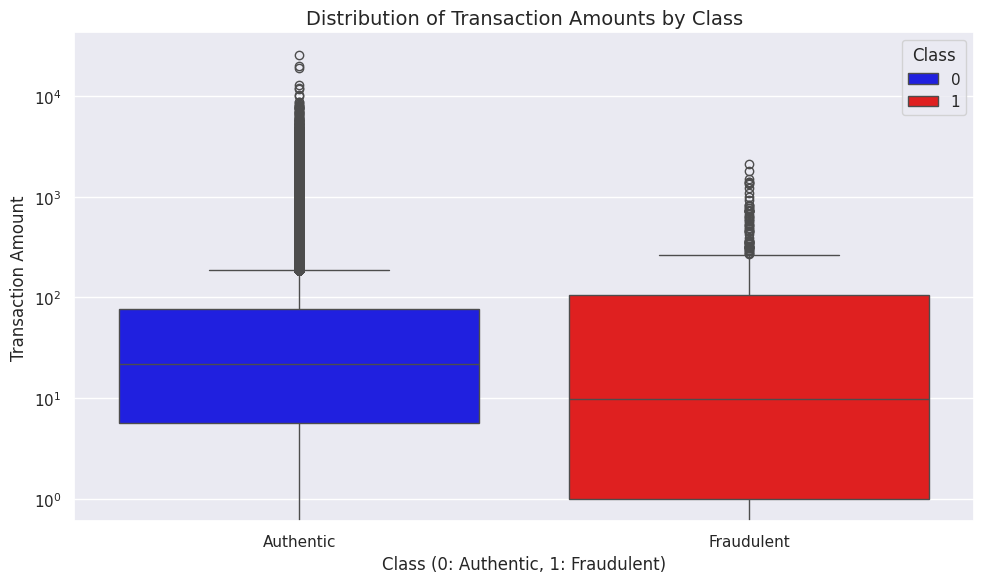

In [ ]:
# Theme for the plot
sns.set_theme(style="darkgrid")

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Class',
    y='Amount',
    data=data,
    hue='Class',
    palette={0: 'blue', 1: 'red'},
    hue_order=[0, 1],
    dodge=False
)

# Plot appearance
plt.title('Distribution of Transaction Amounts by Class', fontsize=14)
plt.xlabel('Class (0: Authentic, 1: Fraudulent)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Authentic', 'Fraudulent'])

# Logarithmic scale used for better visibility of outliers
plt.yscale('log')

# Layout
plt.tight_layout()
plt.show()

Observations:

Fraudulent transactions had a higher mean transaction amount (123.87 vs. 88.41), but their median value (9.82) was much lower than that of authentic transactions (22.00). This suggests that while fraudulent transactions sometimes involve larger sums, most of them are for smaller amounts. Most fraudulent transactions ranged from $1 to $105.89, as observed by our 25th and 75th quartiles. Although infrequent, there are larger sums of up to 2125.87.

Both classes show variability, with very similar standard deviations (fraudulent: 260.21, authentic: 250.37), though fraudulent transactions show a slightly larger range. The maximum value for authentic transactions (25,691.16) was much higher than that of fraudulent transactions (2125.87), and outliers were more prevalent among authentic transactions.

Patterns noticed with fraudulent transaction amounts could definitely help flag fraud activity. For instance, more common and smaller transactions of $1 to $105 could be closely monitored during early mornings, identified to be high-risk periods. Larger transactions that are less frequent could be monitored during high activity timing


# Part 3: Classification Model Training and Evaluation

## In part 3, we will build and evaluate a classification model that detects fraud.

### Pre-processing our data before model training

In [ ]:
X=data.drop(columns='Class')

y=data['Class']

In [ ]:
# Splitting the data by 80% - 20% for training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

We are dealing with a highly imbalanced dataset, with 99.8% of the transactions being authentic and 0.167% of the transactions being fraudulent.

Most machine learning models optimize for overall accuracy. In scnenarios involving imbalanced classes, optimizing for overall accuracy can be miss leading, as minority classes can get overlooked.

In the context of our data, if a model predicts "Authentic" and 99.8% of our transactions are authentic, it would indeed show an accuracy of 99.8%. However, this model would be ineffective in its primary function; detecting fraud — because it fails to identify any fraudulent transactions.  

To address this, we will implement the Synthetic Minority Over-sampling Technique (SMOTE). This method synthesizes new examples of the underrepresented fraudulent transactions, helping to balance the dataset and enhance the model's ability to detect fraud accurately.

In addition to using SMOTE, we also will scale the features. In addition to being imbalanced, the feature values in the dataset, particularly the PCA components vs transactions amounts and time are also largely varied.

For instance, if one feature ranges from 0 to 1 while another ranges from 0 to 1000, the model may give undue weight to the latter, leading to biased predictions. Scaling the features will ensure that all our input variables contribute equally to the model's learning process.

By combining SMOTE with feature scaling, we aim to create a more balanced dataset that allows our model to learn effectively from both the majority (Authentic) and minority (Fraudulent) classes. This approach enhances the model's ability to identify fraudulent transactions accurately.

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Logistic Regression

In [ ]:
# Specified parameters
scaler = StandardScaler()
lg_model = LogisticRegression(solver='saga', max_iter=5000)

# Pipeline to scale the data and fit the model
pipeline = make_pipeline(scaler, lg_model)

# Training the model on the resampled data
pipeline.fit(X_train_resampled, y_train_resampled)

# Check the number of iterations used
lg_model = pipeline.named_steps['logisticregression']
print(f"Number of iterations used: {lg_model.n_iter_}")

Number of iterations used: [1900]


In [ ]:
# Predictions on the test set
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train_resampled)

### Evaluation Metrics and Observations


In [ ]:
# Recall score

print("\nRecall Score:")

print(f"Train Recall: {recall_score(y_train_resampled, y_pred_train)}")

print(f"Test Recall: {recall_score(y_test, y_pred_test)}")

# Accuracy Score

print("\nAccuracy Score:")

print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_pred_train)}")

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")


Recall Score:
Train Recall: 0.9712756286352283
Test Recall: 0.8526315789473684

Accuracy Score:
Train Accuracy: 0.9813439422423456
Test Accuracy: 0.9912592958093963


**Recall Observations:**

Training Recall (0.9718): The model is good at identifying most fraudulent transactions in the training data.

Test Recall (0.8526): The model's ability to detect fraud drops on the test data. This suggests that while the model learns well on the training data, it struggles to generalize as effectively to unseen data, especially for the minority fraudulent class.

**Accuracy Observations:**

Training Accuracy (0.9813): The model performs well overall on the training data.
Test Accuracy (0.9912): Surprisingly, the model performs even better on the test data, which is unusual because models usually perform better on training data. This could mean the test data is simpler or the model is generalizing well to new examples.

**Interpretation:**

**SMOTE and Test Set:** Since SMOTE creates synthetic data for the minority class in the training set, the model may face more complex patterns during training. In contrast, the test set might be easier, which could explain the higher test accuracy compared to training accuracy.

**Accuracy vs. Recall:** Accuracy measures the overall correctness, which is influenced by the majority class (authentic transactions). A high accuracy doesn’t necessarily mean the model is good at detecting fraud (minority class). Recall, however, focuses on correctly identifying fraudulent transactions. So, while accuracy is high, the drop in recall on the test set suggests the model misses some fraud cases.

**Precision-Recall Trade-Off:** The model might be playing it safe by predicting fewer transactions as fraud (to keep false positives low). This increases accuracy but reduces recall (misses more fraudulent transactions).

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.14      0.85      0.25        95

    accuracy                           0.99     56746
   macro avg       0.57      0.92      0.62     56746
weighted avg       1.00      0.99      0.99     56746



**Observations:**

**Class 0 (Authentic) Performance:**

Precision: 1.00
Recall: 0.99
F1-Score: 1.00
Support: 56,651

The model performs excellently at identifying authentic transactions.

**Class 1 (Fraudulent) Performance:**

Precision: 0.14
Recall: 0.85
F1-Score: 0.25
Support: 95

The model has low precision for fraudulent transactions, indicating it makes many false positives, but it identifies 85% of fraudulent transactions, which is relatively good recall.

**Overall Performance:**

Accuracy: 0.99
Macro Average Recall: 0.92
Weighted Average F1-Score: 0.99
The overall model shows high accuracy and a good average performance for both classes, but there's a significant imbalance in how well it handles both classes (precision is low for fraudulent transactions).

**Key Observations:**
Recall for Class 1 (Fraudulent): The model performs reasonably well at identifying fraudulent transactions (85% recall), but there is room for improvement in reducing false positives (low precision).

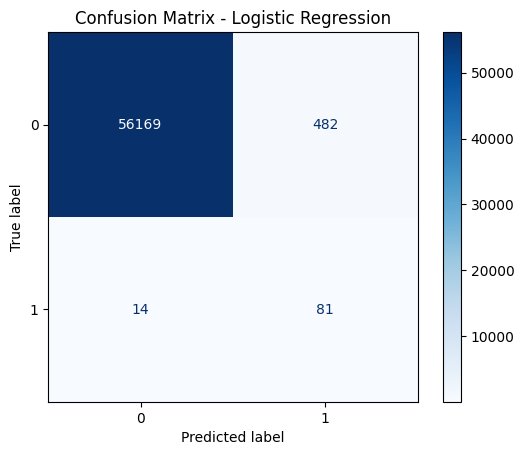

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Observations:**

True Negative (TN) [0,0]: 56,169

- The number of authentic transactions that were correctly identified as authentic.

False Positive (FP) [0,1]: 482

- The number of authentic transactions incorrectly predicted as fraudulent.

False Negative (FN) [1,0]: 14

- The number of fraudulent transactions incorrectly predicted as authentic.

True Positive (TP) [1,1]: 81

- The number of fraudulent transactions correctly identified as fraudulent.

**Interpretations:**

High True Negative Rate:

- The model is very effective at identifying the majority class (authentic transactions). The high number of true negatives suggests that it can reliably discern authentic transactions.

Moderate False Positives:

- The number of false positives, while relatively small compared to the number of true negatives, is still significant. This indicates that the model sometimes labels authentic transactions as fraudulent, which could potentially lead to unnecessary alerts or checks in a practical scenario.

Low False Negatives:

- Only a few fraudulent transactions were missed (false negatives). This is crucial in fraud detection because failing to detect fraudulent transactions can be costly. The low number here suggests the model is fairly sensitive to detecting fraud.

Good True Positive Rate:

- Although the number of true positives is less than the false positives, it’s still a good result given the highly imbalanced nature of the data. The model can identify a substantial number of fraudulent transactions.

### KNN Regression

To use KNN Regression, we will use the same testing and training data split up in the Logistic Regression.

In [ ]:
#First, we need to scale the attributes of the dataset, otherwise KNN Regression will not work since it uses distance to datapoints.

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
#Now we can use the K-Nearest Neighbours Classifier to create a model based on our training piece.

KNNmodel = KNeighborsClassifier(n_neighbors=7)
KNNmodel.fit(X_train, y_train)

y_predictions = KNNmodel.predict(X_test)


In [ ]:
#Print off the Classification Report and Accuracy Score

print(classification_report(y_test, y_predictions))

print(accuracy_score(y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.77      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962

0.9994557775359011


Observations:

Class 0 (Authentic) Performance:

Precision: 1.00 Recall: 1.00 F1-Score: 1.00 Support: 56,864

This model model also performs excellently at identifying authentic transactions.

Class 1 (Fraudulent) Performance:

Precision: 0.90 Recall: 0.77 F1-Score: 0.83 Support: 98

This model has much better precision for fraudulent transactions (ie few false positives). However, we make note that it identifies less fraudulent transactions at 77%.

Overall Performance:

The overall performance of this model is more balanced between the two classes with a slight decrease in actually identifying fraudulent transactions.

Key Observations: This model provides an alternative approach where it will provide the user with less overall fraudulent transactions but at a significantly smaller risk of false identifying.

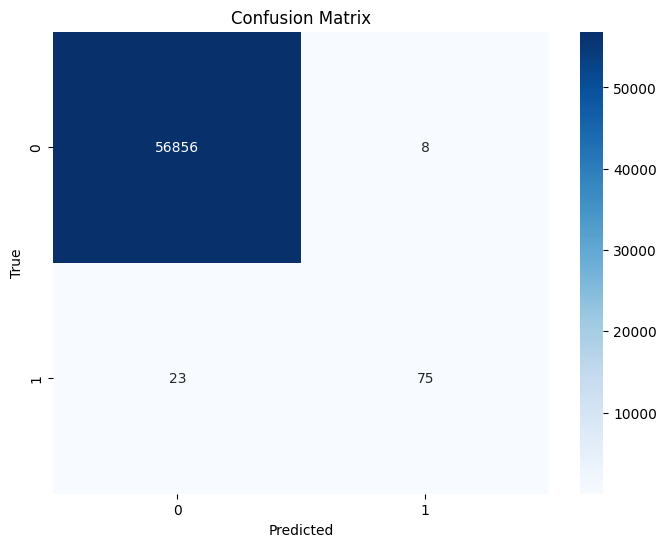

In [ ]:
cmatrix = confusion_matrix(y_test, y_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Observations:

True Negative (TN) [0,0]: 56,856

The number of authentic transactions that were correctly identified as
authentic.

False Positive (FP) [0,1]: 8

The number of authentic transactions incorrectly predicted as fraudulent.

False Negative (FN) [1,0]: 23

The number of fraudulent transactions incorrectly predicted as authentic.

True Positive (TP) [1,1]: 75

The number of fraudulent transactions correctly identified as fraudulent.

Interpretations:

High True Negative Rate:

Once again the model is very effective at identifying the majority class (authentic transactions). The high number of true negatives suggests that it can reliably discern authentic transactions.

Low False Positives:

The number of false positives is very insignificant when considering the large dataset. This model has a decreased risk of the previously mentioned scenario of sending unnecessary alerts or checks.

Slight Increase in False Negatives:

While the number of missed fraudulent transactions is still relatively low with this model, there is almost a 65% increase in this category compared to the Logistic Regression Model. This is a significant increase and should be taken into consideration with the sensitivity of our goal (detecting fraud).

Good True Positive Rate:

The model can still identify a substantial number of fraudulent transactions, but as mentioned above, it is more likely to miss a fraudulent transaction.

#Logistic Regression vs KNN Regression

Both models performed by Logistic Regression and KNN Regression respectively are sufficient at identifying fraudulent transactions.

The LR Model was less precise at identifying a fraudulent transaction, but managed to locate more of them with this approach. This model could be inconvenient for customers as they would be more likely to receive a false alert.

The KNN Model did not make as many mistakes when it came to declaring a transaction as fraudulent, but did make noticable mistakes by determining more fraudulent transactions as legitimate. This approach resulted in less fraudulent transactions being located overall. This model could be hurtful to customers as they are at an increased risk of a fraudulent transaction going unnoticed.

